In [29]:
import pandas as pd
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Hypothesis Test Example</h2>

It is a fact that about 10% of the population is made up of lefties.

However, after taking a random sample of 500 UC Berkeley students, we discover that 13% of them were left-handed. Now, we suspect that students at UC Berkeley are more likely to be left-handed than the rest of the population. How can we test this? With a hypothesis test!

<h3>Hypotheses</h3>

Null: 10% of UC Berkeley students are left-handed, just as the rest of the population is. Any difference is due to random chance.

Alternative: UC Berkeley students are more likely to be left-handed than the rest of the population.

In [83]:
def sample_proportions(sample_size, model_props):
    """Serves the same purpose as the DataScience package 'sample_proportions' function."""
    return np.random.multinomial(sample_size, model_props)/sample_size

<h3>Choosing a Test Statistic</h3>

What would be a good choice?

a) Absolute difference of the proportion of UC Berkeley students who are left-handed and 0.10

b) Proportion of UC Berkeley students who are left-handed - 0.10

c) Proportion of UC Berkeley students who are left-handed

<h3>Observed Value of the Test Statistic</h3>

In [108]:
obs_val = 0.13

<h3>Simulating Values of the Test Statistic Under the Null</h3>

(array([  2.,   7.,  36., 150., 224., 238., 215.,  84.,  33.,  11.]),
 array([0.054 , 0.0626, 0.0712, 0.0798, 0.0884, 0.097 , 0.1056, 0.1142,
        0.1228, 0.1314, 0.14  ]),
 <a list of 10 Patch objects>)

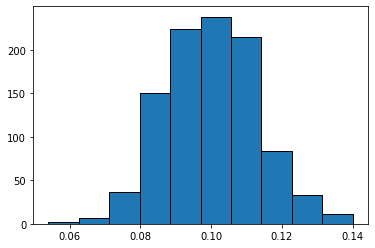

In [148]:
model_proportions = [0.10, 0.90]
simulated_prop_lefties = []

for i in range(1000):
    sim_stat = sample_proportions(500, model_proportions)
    sim_left_prop = sim_stat[0]
    simulated_prop_lefties.append(sim_left_prop)
#simulated_prop_lefties
    

simulated_prop_lefties = np.array(simulated_prop_lefties)

plt.hist(simulated_prop_lefties)

<h3>Calculating Confidence Interval</h3>

In [175]:
left_end = np.percentile(simulated_proportion_lefties, 2.5)#percentile(25, simulated_proportion_lefties)
right_end = np.percentile(simulated_proportion_lefties, 97.5)
ci = make_array(left_end, right_end)
ci

array([0.07395, 0.126  ])

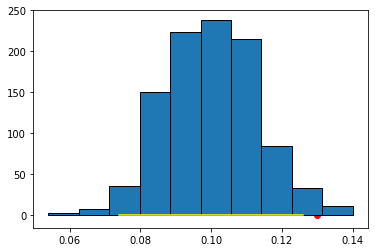

In [177]:
plt.hist(simulated_prop_lefties)
plt.plot(ci, [0,0], color = 'yellow')
plt.scatter(obs_val, 0, color = 'red')

<h3>Calculating P-Value</h3>

In [178]:
#show how changing the value of the obs_val causes the dot to be in the CI/out of it. 
p_value = sum(simulated_prop_lefties >= obs_val)/len(simulated_prop_lefties)
p_value

0.015